## Cogs 108 - Final Project

## Overview

## Names

- Nicholas Paz

## Group Member IDs

- A13313260

## Research Question

## Background and Prior Work

## Hypothesis

## Datasets

## Setup

In [111]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
sns.set_context('talk')
pd.set_option('precision', 2)

## Data Cleaning

In [112]:
us_states=[
    "AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DC", "DE", "FL", "GA", 
    "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD", "MA", 
    "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", "NM", "NY", 
    "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC", "SD", "TN", "TX", 
    "UT", "VT", "VA", "WA", "WV", "WI", "WY"
]

# extract date from date_time column
def extract_year(str_in):
    date_string = str_in.split('T')[0]
    [year,month,day] = date_string.split('-')
    return int(year)

# extract month from date_time column
def extract_month(str_in):
    date_string = str_in.split('T')[0]
    [year,month,day] = date_string.split('-')
    return int(month)
    
# extract time of day from date_time column
def extract_time(str_in):
    time_string = str_in.split('T')[1]
    [hour,minute,second] = time_string.split(':')
    return float(hour) + float(minute) / 60



In [113]:
df_ufo = pd.read_csv('nuforc_reports.csv')

# general cleaning
df_ufo = df_ufo.drop(columns=['summary','report_link','text','posted','stats'])
df_ufo = df_ufo.dropna()
df_ufo = df_ufo[df_ufo['state'].isin(us_states)]
df_ufo = df_ufo[df_ufo['city_longitude']<-60]
df_ufo = df_ufo[df_ufo['city_latitude']>0]

# create time and day columns
df_ufo['year'] = df_ufo['date_time'].apply(extract_year)
df_ufo['month'] = df_ufo['date_time'].apply(extract_month)
df_ufo['time'] = df_ufo['date_time'].apply(extract_time)

df_ufo.head()

,city,state,date_time,shape,duration,stats,city_latitude,city_longitude,year,month,time
2,San Antonio,TX,2017-01-25T20:45:00,light,90 minutes,Occurred : 1/25/2017 20:45 (Entered as : 01/2...,29.49,-98.48,2017,1,20.75
3,Port Saint Lucie,FL,2017-02-24T20:45:00,circle,5 minutes,Occurred : 2/24/2017 20:45 (Entered as : 02/2...,27.29,-80.36,2017,2,20.75
4,Whitefish,MT,2017-02-22T21:00:00,light,15 minutes,Occurred : 2/22/2017 21:00 (Entered as : 02/2...,48.41,-114.34,2017,2,21.00
6,Duxbury,MA,2017-01-31T06:00:00,unknown,2,Occurred : 1/31/2017 06:00 (Entered as : 01/3...,42.05,-70.69,2017,1,6.00
7,Studio City,CA,2017-01-29T10:34:00,light,3 minutes,Occurred : 1/29/2017 10:34 (Entered as : 01/2...,34.14,-118.39,2017,1,10.57


## Data Visualization

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


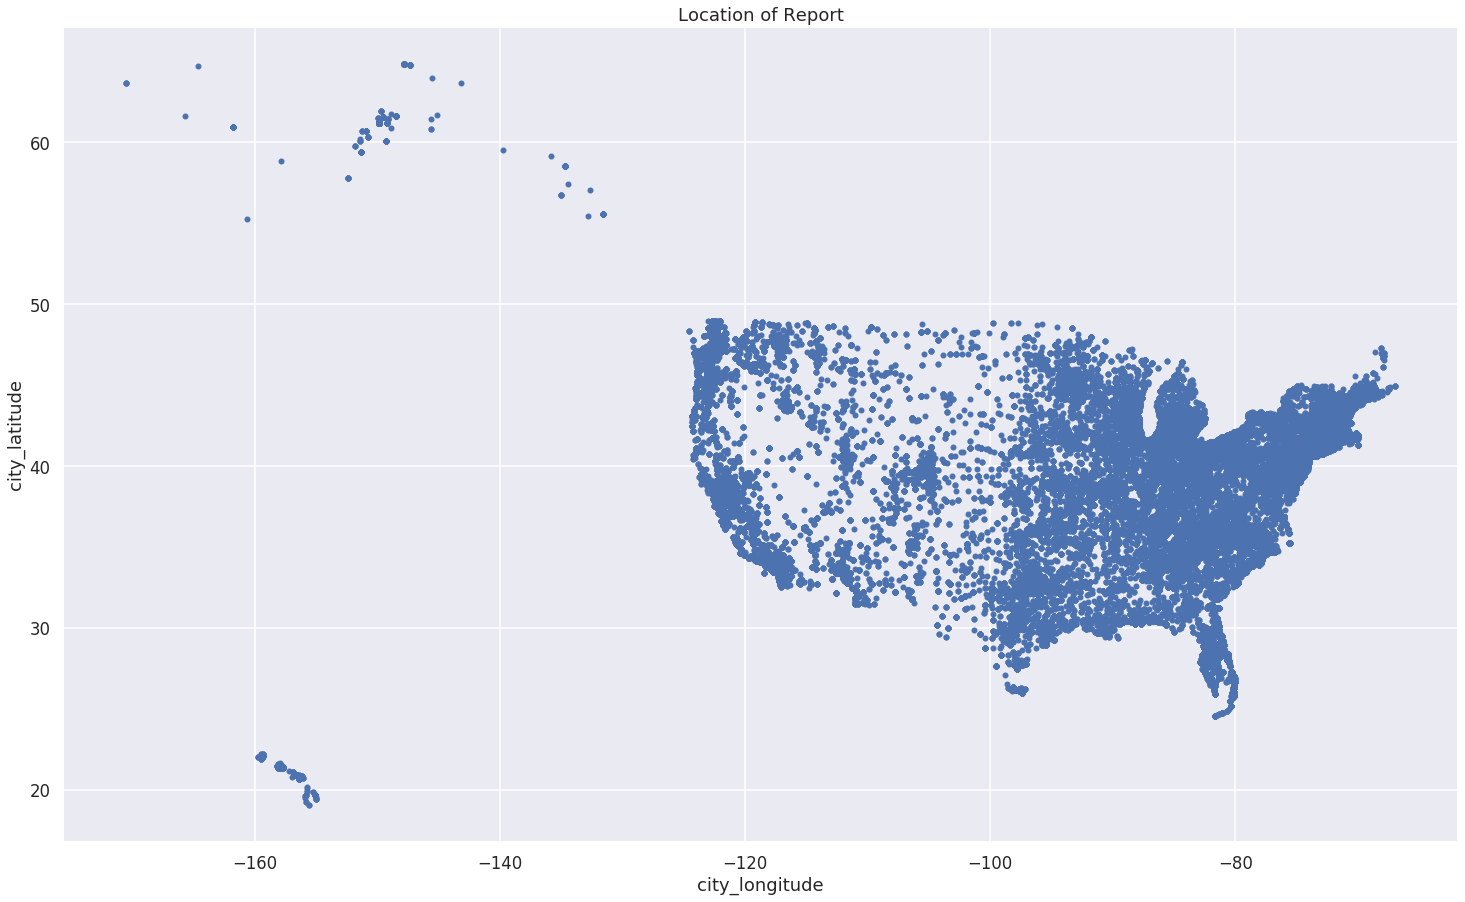

In [114]:
df_ufo.plot(
    kind='scatter',
    x='city_longitude',
    y='city_latitude',
    figsize=(25,15),
    title='Location of Report'
)

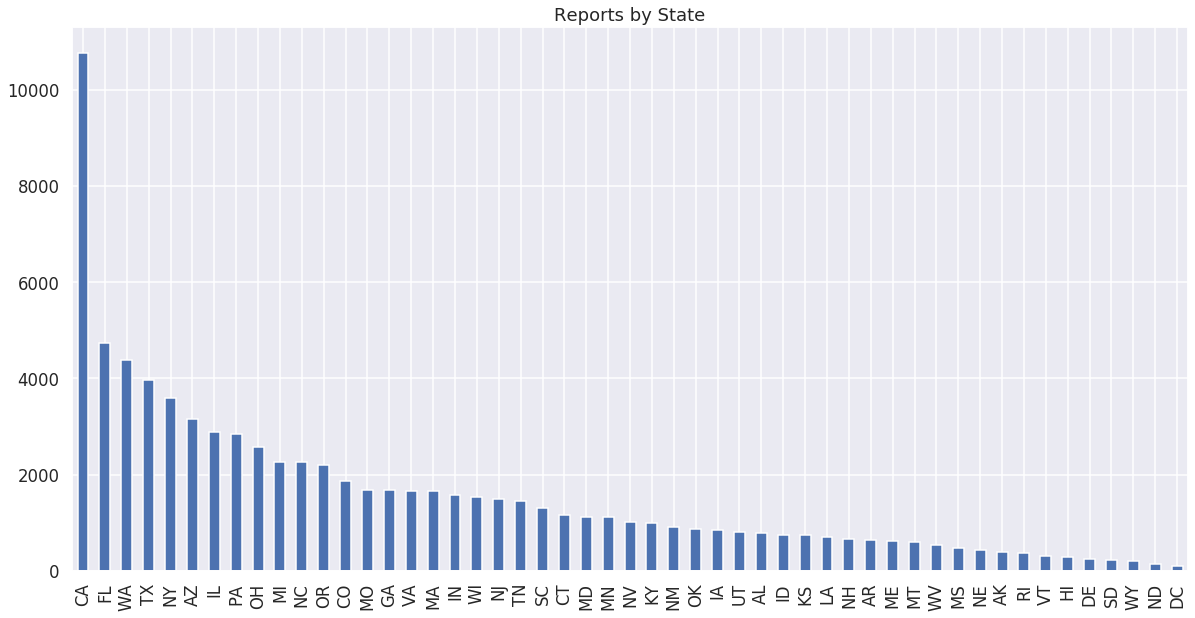

In [115]:
df_ufo['state'].value_counts().plot(
    kind='bar',
    figsize=(20,10),
    title='Reports by State'
)

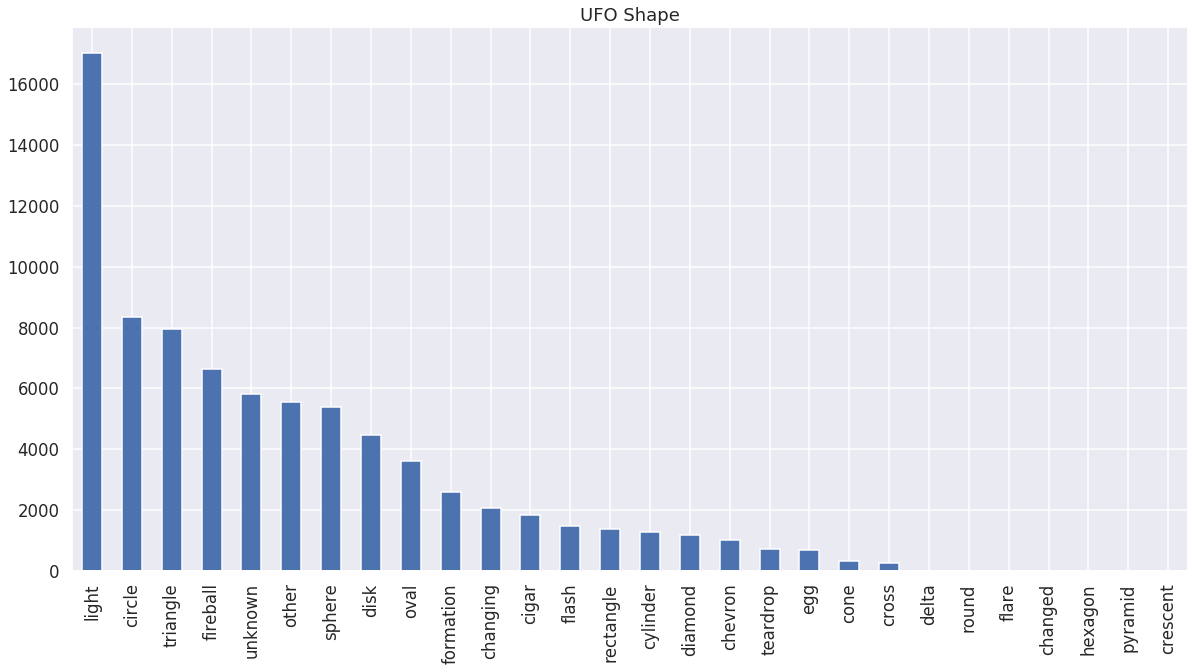

In [116]:
df_ufo['shape'].value_counts().plot(
    kind='bar',
    figsize=(20,10),
    title='UFO Shape'
)

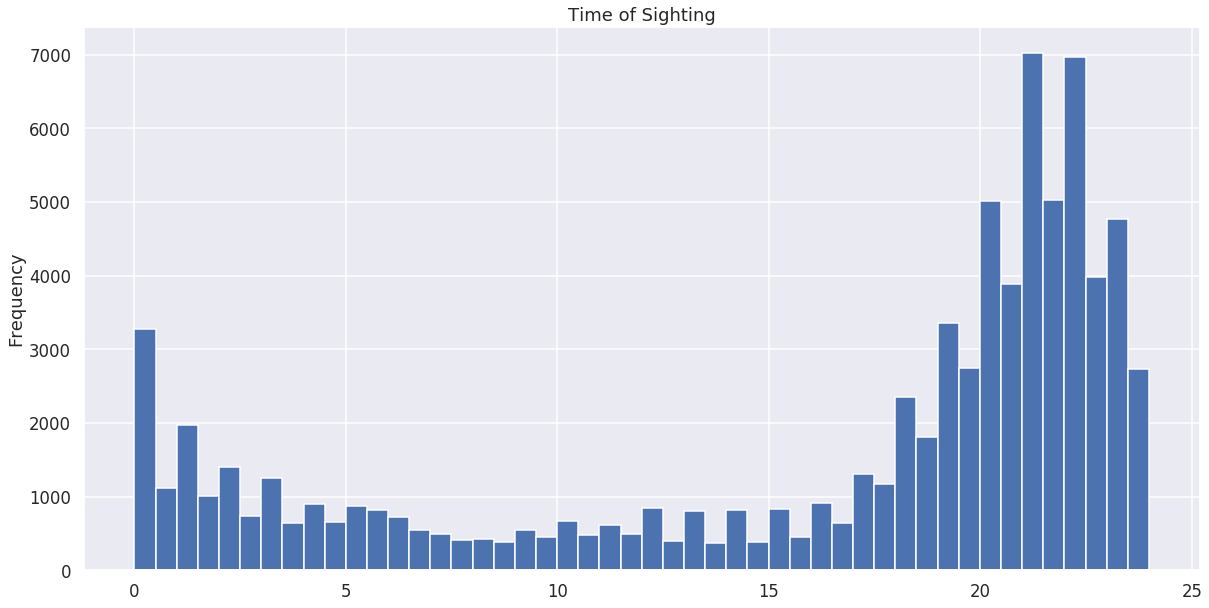

In [117]:
df_ufo['time'].plot(
    kind='hist',
    bins=48,
    figsize=(20,10),
    title='Time of Sighting'
)

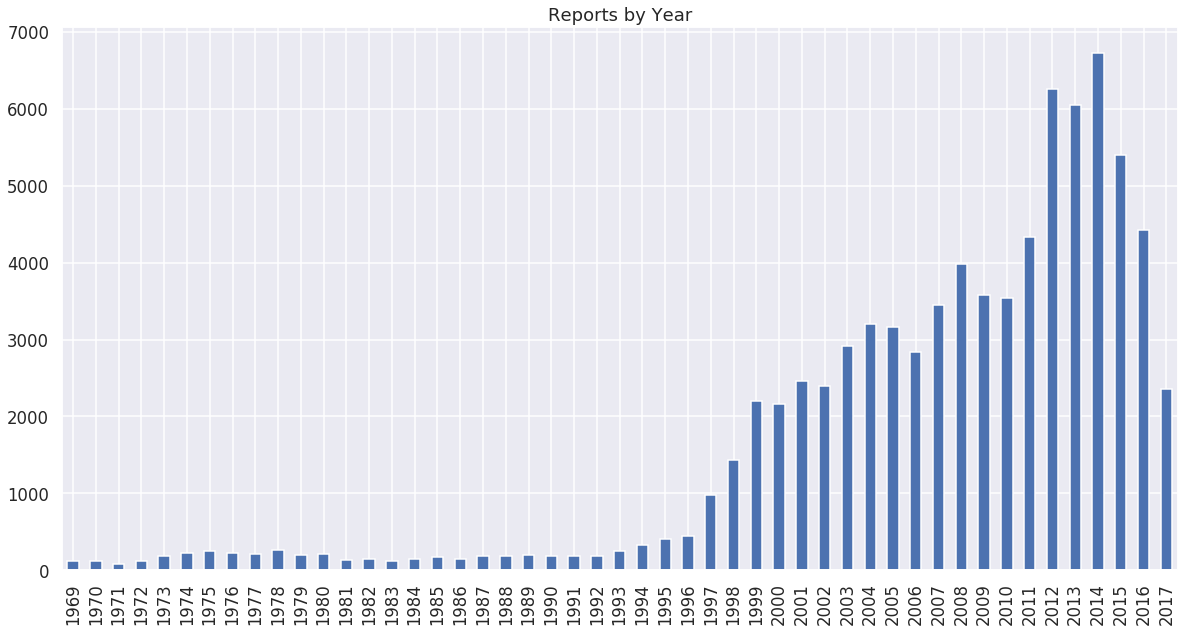

In [118]:
df_ufo['year'].value_counts().sort_index().plot(
    kind='bar',
    sort_columns=True,
    figsize=(20,10),
    title='Reports by Year'
)

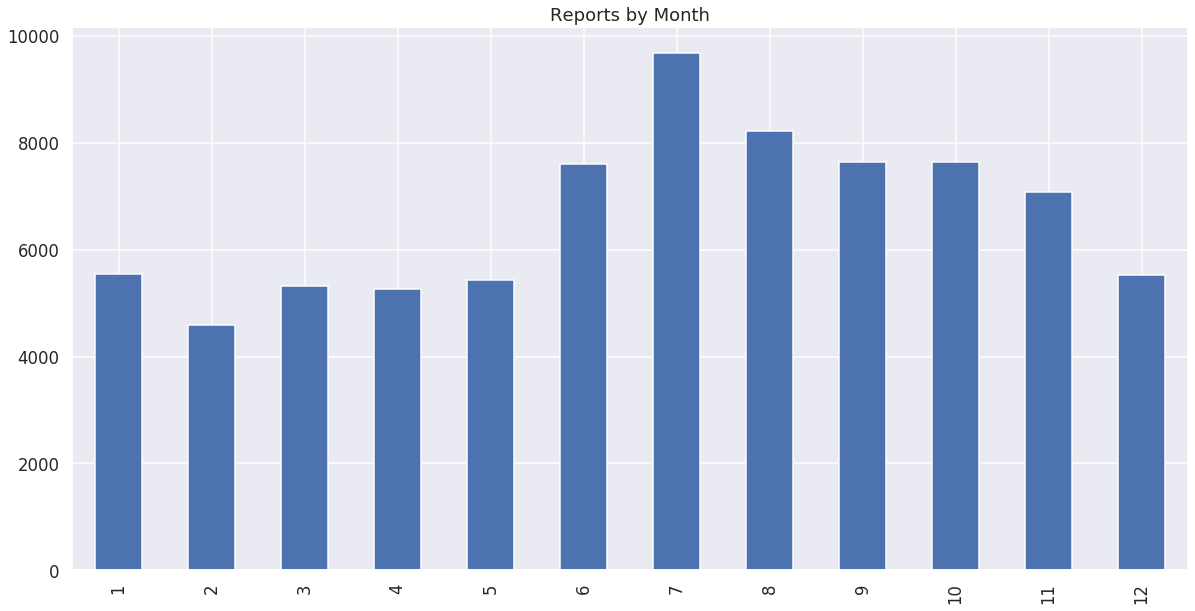

In [119]:
df_ufo['month'].value_counts().sort_index().plot(
    kind='bar',
    sort_columns=True,
    figsize=(20,10),
    title='Reports by Month'
)

(8254,)